# Apply the RF model over the selected index (image)

### 1.Case of Cafine
 #####  1.1. Export the image from GEE with the selected index
 #####  1.2 Download the image from GEE and apply the RF model 

### 2.Case of Elalab
 #####  2.1. Export the image from GEE with the selected index
 #####  2.2  Download the image from GEE and apply the RF model 

### 3.Case of Enchugal
 #####  3.1. Export the image from GEE with the selected index
 #####  3.2  Download the image from GEE and apply the RF model 


-----------------------------------------------------------------

## 1. Cafine case

### 1.1 Export the image from GEE with the selected index

In [5]:
# Importar librerias al entorno
import geemap
import ee

In [6]:
Map = geemap.Map(center = (11.2114, -15.1915), zoom = 12)
Map

KeyboardInterrupt: 

In [ ]:
# Asegurarnos de la creación de una geometría / Por si no la crearon en el mapa anterior.
geometry = ee.Geometry.Polygon([[[-15.21471, 11.188674],
   [-15.21471, 11.222857],
   [-15.133365, 11.222857],
   [-15.133365, 11.188674],
   [-15.21471, 11.188674]]])

In [ ]:
collection = ee.ImageCollection("projects/planetscopejesus/assets/Datos_Gabo")

texture = ee.ImageCollection("projects/planetscopejesus/assets/Texture_cafine")
pca = ee.Image('projects/planetscopejesus/assets/pca_cafine').float()

collection = collection.filterDate('2022-05-01', '2022-05-30').filterBounds(geometry) # PREGUNTAR A GABO.

# This function maps spectral indices for salinity Mapping using PlanetScope Imagery
def addIndices(img):
  # NDVI
  NDVI = img.normalizedDifference(['b8','b6']).rename('NDVI')
  SR = img.select('b8').divide(img.select('b6')).rename('SR')
  # GCVI
  GCVI = img.expression('(NIR/GREEN)-1',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GCVI')
  # NDWI (GREEN-NIR)/(GREEN+NIR)
  NDWI = img.expression('(GREEN-NIR)/(GREEN+NIR)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('NDWI')
  # VARI (Green−Red)/(Green+Reed−Blue)
  VARI = img.expression('(Green1-Red)/(Green1+Red-Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('VARI')
  # GRVI (NIR/GREEN)
  GRVI = img.expression('(NIR/GREEN)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GRVI')
  # GNDVI (NIR-GREEN)/(NIR+GREEN)
  GNDVI = img.normalizedDifference(['b8','b3']).rename('GNDVI')
  # SAVI
  SAVI = img.expression('(NIR-RED)/((NIR+RED+0.5)*1.5)',{'NIR': img.select('b8'),'RED': img.select('b6')}).rename('SAVI')
  # VSSI = 2 ∗ 𝐵3 − 5(𝐵4 + 𝐵5) / Green(B3), Red(B4), NIR(B5)
  VSSI = img.expression('2*GREEN-5*(RED+NIR)',{'GREEN': img.select('b3'),'RED': img.select('b6'),'NIR': img.select('b8')}).rename('VSSI')
  # S1 (Blue/Red)
  S1 = img.select('b2').divide(img.select('b6')).rename('S1')
  # S1 (B − R)/(B + R)
  S2 = img.expression('(Blue-Red)/(Blue + Red)',{'Blue':img.select('b2'),'Red':img.select('b6') }).rename('S2')
  # S3_G1 (G1 × R)/B
  S3_G1 = img.expression('(Green1*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('S3_G1')
  # S3_G2 (G1 × R)/B
  S3_G2 = img.expression('(Green2*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green2':img.select('b4') }).rename('S3_G2')
  # S4 (B×R)**0.5
  S4 = img.expression('(Blue*Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('S4')
  # S5_G1 ((B × R)/G1)
  S5_G1= img.expression('(Blue*Red)/Green1',{'Blue':img.select('b2'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S5_G1')
  # S5_G2 ((B × R)/G1)
  S5_G2 = img.expression('(Blue*Red)/Green2',{'Blue':img.select('b2'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('S5_G2')
 # S6_G1 (R × NIR)/G1
  S6_G1 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G1')
  # S6_G2 (R × NIR)/G2
  S6_G2 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G2')
  # SI (B+R)**0.5
  SI = img.expression('(Blue+Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('SI')
  # NDSI (R − NIR)/(R + NIR)
  NDSI = img.normalizedDifference(['b6','b8']).rename('NDSI')
  # SI1_G1 (G1×R)**0.5
  SI1_G1 = img.expression('(Green1*Red)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI1_G1')
  # SI1_G2 (G1×R)**0.5
  SI1_G2 = img.expression('(Green2*Red)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI1_G2')
  # SI2_G1 [(G1)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G1 = img.expression('((Green1)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI2_G1')
  # SI2_G2 [(G2)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G2 = img.expression('((Green2)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI2_G2')
  # SI3_G1 ((G1)**2 + (R)**2)**0.5
  SI3_G1 = img.expression('((Green1)**2 + (Red)**2)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI3_G1')
  # SI3_G2 ((G1)**2 + (R)**2)**0.5
  SI3_G2 = img.expression('((Green2)**2 + (Red)**2)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI3_G2')
  # Int1_G1 (G1 + R)/2
  Int1_G1 = img.expression('(Green1+Red)/2',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int1_G1')
  # Int1_G2 (G2 + R)/2
  Int1_G2 = img.expression('(Green2+Red)/2',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int1_G2')
  # Int2_G1 (G1 + R + NIR)/2
  Int2_G1 = img.expression('(Green1 + Red + NIR)/2',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int2_G1')
  # Int2_G2 (G1 + R + NIR)/2
  Int2_G2 = img.expression('(Green2 + Red + NIR)/2',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int2_G2')
  YRS6_G1 = img.expression('(Y*NIR)/G1',{'Y': img.select('b5'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y*NIR)/G2',{'Y': img.select('b5'),'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  RS6_G1 = img.expression('(Red_edge*NIR)/G1',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge*NIR)/G2',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G2': img.select('b4')}).rename('RS6_G2')
  RS1 = img.expression('B/Red_edge', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS1')
  RS2 = img.expression('(B - Red_edge) / (B + Red_edge)', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS2')
  RS3_G1 = img.expression('(G1 * Red_edge) / B', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G1')
  RS3_G2 = img.expression('(G2 * Red_edge) / B', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G2')
  RS4 = img.expression('(B * Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS4')
  RS5_G1 = img.expression('(B * Red_edge) / G1', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G1': img.select('b3')}).rename('RS5_G1')
  RS5_G2 = img.expression('(B * Red_edge) / G2', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G2': img.select('b4')}).rename('RS5_G2')
  RS6_G1 = img.expression('(Red_edge * NIR) / G1', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge * NIR) / G2', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('RS6_G2')
  RNDSI = img.expression('(Red_edge - NIR) / (Red_edge + NIR)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDSI')
  RNDVI = img.expression('(NIR - Red_edge) / (NIR + Red_edge)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDVI')
  RSI = img.expression('(B + Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RSI')
  RSI1_G1 = img.expression('(G1 * Red_edge) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI1_G1')
  RSI1_G2 = img.expression('(G2 * Red_edge) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI1_G2')
  RSI2_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G1')
  RSI2_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G2')
  RSI3_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI3_G1')
  RSI3_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI3_G2')
  RInt1_G1 = img.expression('(G1 + Red_edge) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RInt1_G1')
  RInt1_G2 = img.expression('(G2 + Red_edge) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RInt1_G2')
  RInt2_G1 = img.expression('(G1 + Red_edge + NIR) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G1')
  RInt2_G2 = img.expression('(G2 + Red_edge + NIR) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G2')
  ####################################################################################### Table 4 ######################################################################################
  YRS1 = img.expression('B/Y', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS1')
  YRS2 = img.expression('(B - Y) / (B + Y)', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS2')
  YRS3_G1 = img.expression('(G1 * Y) / B', {'G1': img.select('b3'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G1')
  YRS3_G2 = img.expression('(G2 * Y) / B', {'G2': img.select('b4'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G2')
  YRS4 = img.expression('(B * Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS4')
  YRS5_G1 = img.expression('(B * Y) / G1', {'B': img.select('b2'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YRS5_G1')
  YRS5_G2 = img.expression('(B * Y) / G2', {'B': img.select('b2'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YRS5_G2')
  YRS6_G1 = img.expression('(Y * NIR) / G1', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y * NIR) / G2', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  YRSI = img.expression('(B + Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRSI')
  YRSI1_G1 = img.expression('(G1 * Y) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI1_G1')
  YRSI1_G2 = img.expression('(G2 * Y) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI1_G2')
  YRSI2_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G1')
  YRSI2_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G2')
  YRSI3_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI3_G1')
  YRSI3_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI3_G2')
  YRInt1_G1 = img.expression('(G1 + Y) / 2', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRInt1_G1')
  YRInt1_G2 = img.expression('(G2 + Y) / 2', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRInt1_G2')
  YRInt2_G1 = img.expression('(G1 + Y + NIR) / 2', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G1')
  YRInt2_G2 = img.expression('(G2 + Y + NIR) / 2', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G2')
  YRNDSI = img.expression('(Y - NIR) / (Y + NIR)', {'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRNDSI')
  ##########################################################
  YRNDVI = img.expression('(NIR - Y) / (NIR + Y)', {'NIR': img.select('b8'), 'Y': img.select('b5')}).rename('YRNDVI')
  YBS1 = img.expression('Y / R', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS1')
  YBS2 = img.expression('(Y - R) / (Y + R)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS2')
  YBS4 = img.expression('(Y * R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS4')
  YBS5_G1 = img.expression('(Y * R) / G1', {'Y': img.select('b5'), 'R': img.select('b6'), 'G1': img.select('b3')}).rename('YBS5_G1')
  YBS5_G2 = img.expression('(Y * R) / G2', {'Y': img.select('b5'), 'R': img.select('b6'), 'G2': img.select('b4')}).rename('YBS5_G2')
  YBSI = img.expression('(Y + R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBSI')
  YGS3 = img.expression('(Y * R) / B', {'B': img.select('b2'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGS3')
  YGSI1 = img.expression('(Y * R) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGSI1')
  YGSI2 = img.expression('((Y ** 2) + (R ** 2) + (NIR ** 2)) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGSI2')
  YGSI3 = img.expression('((Y ** 2) + (R ** 2)) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGSI3')
  YGInt1 = img.expression('(Y + R) / 2', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGInt1')
  YGInt2 = img.expression('(Y + R + NIR) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGInt2')
  YNS6_G1 = img.expression('(R * Y) / G1', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNS6_G1')
  YNS6_G2 = img.expression('(R * Y) / G2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNS6_G2')
  YNSI2_G1 = img.expression('((G1 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G1')
  YNSI2_G2 = img.expression('((G2 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G2')
  YNInt2_G1 = img.expression('(G1 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNInt2_G1')
  YNInt2_G2 = img.expression('(G2 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNInt2_G2')
  YNNDSI = img.expression('(R - Y) / (R + Y)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNNDSI')
  YNNDVI = img.expression('(Y - R) / (Y + R)', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YNNDVI')
  return img \
    .addBands(NDVI)\
    .addBands(SR) \
    .addBands(GCVI) \
    .addBands(NDWI) \
    .addBands(VARI) \
    .addBands(GNDVI)\
    .addBands(GRVI) \
    .addBands(SAVI)\
    .addBands(VSSI)\
    .addBands(S1) \
    .addBands(S2) \
    .addBands(S3_G1) \
    .addBands(S3_G2) \
    .addBands(S4) \
    .addBands(S5_G1) \
    .addBands(S5_G2) \
    .addBands(S6_G1) \
    .addBands(S6_G2) \
    .addBands(SI) \
    .addBands(NDSI) \
    .addBands(SI1_G1) \
    .addBands(SI1_G2) \
    .addBands(SI2_G1) \
    .addBands(SI2_G2) \
    .addBands(SI3_G1) \
    .addBands(SI3_G2) \
    .addBands(Int1_G1) \
    .addBands(Int1_G2) \
    .addBands(Int2_G1) \
    .addBands(Int2_G2) \
    .addBands(YRS6_G1)\
    .addBands(YRS6_G2)\
    .addBands(RS6_G1)\
    .addBands(RS6_G2)\
    .addBands(RS1) \
    .addBands(RS2) \
    .addBands(RS3_G1) \
    .addBands(RS3_G2) \
    .addBands(RS4) \
    .addBands(RS5_G1) \
    .addBands(RS5_G2) \
    .addBands(RNDSI) \
    .addBands(RNDVI)\
    .addBands(RSI) \
    .addBands(RSI1_G1) \
    .addBands(RSI1_G2) \
    .addBands(RSI2_G1) \
    .addBands(RSI2_G2) \
    .addBands(RSI3_G1) \
    .addBands(RSI3_G2) \
    .addBands(RInt1_G1) \
    .addBands(RInt1_G2) \
    .addBands(RInt2_G1) \
    .addBands(RInt2_G2) \
    .addBands([YRS1, YRS2, YRS3_G1, YRS3_G2, YRS4, YRS5_G1, YRS5_G2,
                        YRSI, YRSI1_G1, YRSI1_G2, YRSI2_G1, YRSI2_G2, YRSI3_G1, YRSI3_G2,
                        YRInt1_G1, YRInt1_G2, YRInt2_G1, YRInt2_G2, YRNDSI])\
    .addBands([YRNDVI, YBS1, YBS2, YBS4, YBS5_G1, YBS5_G2, YBSI, YGS3, YGSI1, YGSI2, YGSI3,
               YGInt1, YGInt2, YNS6_G1, YNS6_G2, YNSI2_G1, YNSI2_G2, YNInt2_G1, YNInt2_G2,
               YNNDSI, YNNDVI])


ps = collection

#Add the indices
ps_1 = ps.map(addIndices)
composite = ps_1 \
              .mean()\
              .float()

texture1 = texture.mean()


# Seleccionar la banda NIR
nir = composite.select('b8').toInt32()

# Calcular la textura utilizando el índice de contraste (Contrast Index)
texture = nir.glcmTexture()
texture_b8 = texture.select('b8_asm').float()


composite = composite.addBands(texture1).addBands(pca).addBands(texture_b8)

# Agregar la capa de textura al mapa
Map.addLayer(texture, {}, 'Textura NIR')
Map.addLayer(composite, {'bands': ['b6',  'b4',  'b2'], 'min': 201, 'max': 2464}, 'RGB')
Map.addLayer(composite, {'bands': ['S1',  'S2',  'S3_G1'], 'min': 0, 'max': 1}, 'Index')

# NOTA RELEVANTE sobre orden raster de textura de suelo caso Cafine:
# B1_1 = Clay + Silt
# B2_1 = Sand
# B3_1 = Silt
# B4_1 = Clay

# 'RNDSI', 'NDSI', 'NDWI','b3_1 (Silt Raster)','b4_1 (Clay Raster'
#Exportar las bandas para modelar Cafine.
export = composite.select(['RNDSI', 'NDWI','NDSI','b3_1'])


In [ ]:
geemap.ee_export_image_to_drive(
    export, description='PS_Index_filtered_Cafine', folder='Planet_Images_Model_Salinity', region=geometry, scale= 3, crs = 'EPSG:2095'
)

### 1.2 Download the image from GEE and apply the RF model 

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

credentials_path = 'C:/Users/cespe/client_secret_2_775448020170-glgpi5v37ur14of7spbms2gi67g7silt.apps.googleusercontent.com.json'

# Authenticate and create the PyDrive instance
gauth = GoogleAuth()
gauth.LoadClientConfigFile(credentials_path)
gauth.LocalWebserverAuth()  # Opens a browser window to authenticate
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=775448020170-glgpi5v37ur14of7spbms2gi67g7silt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [ ]:
# Google Drive folder ID
folder_id = '1iPqQkFH8ACsOgf0Pk8iZsiXpw0WqP6Sp'  # Replace with your actual folder ID
file_title = 'PS_Index_filtered_Cafine.tif'  # Name of the file you are looking for

try:
    # List all files in the specified folder
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
    
    # Iterate through the file list to find the file with the specified title
    for file in file_list:
        if file['title'] == file_title:
            # Download the file
            file.GetContentFile(file_title)
            print(f"File {file_title} downloaded successfully.")
            break
    else:
        # File not found in the folder
        print(f"File {file_title} not found in folder {folder_id}.")
except Exception as e:
    # Print any errors that occur during the process
    print(f"Error while searching for the file in Google Drive: {e}")

File PS_Index_filtered_Cafine.tif downloaded successfully.


In [7]:
import rasterio
import numpy as np
from sklearn.preprocessing import StandardScaler
import os.path as op
import joblib


# Imagen de entrada
image_filered = '../DataIntermediate/PS_Index_filtered_Cafine.tif'

# Especificar la imagen de salida
output_image = op.join('../Results', "Cafine_RF_Modeled_CE.tif")

with rasterio.open(image_filered, 'r') as src:
    profile = src.profile
    profile.update(
        dtype=rasterio.float32,
        count=1,
    )
    with rasterio.open(output_image, 'w', **profile) as dst:
        # Leer toda la imagen
        data = src.read()

        # Preparar la imagen para la predicción
        img_swp = np.moveaxis(data, 0, 2)
        img_flat = img_swp.reshape(-1, img_swp.shape[-1])

        # Eliminar valores no válidos, almacenar los índices para su uso posterior
        m = np.ma.masked_invalid(img_flat)
        valid_pixels = img_flat[~m.mask.any(axis=1)]
        rf_model_path = '../Results/random_forest_model_global_CE_27_02_2025.joblib'
        scaler_path = '../DataIntermediate/scaler_27_02_2025.joblib'  # Ruta del scaler

        rf_model_raster = joblib.load(rf_model_path)
        scaler = joblib.load(scaler_path)  # Cargar el scaler si fue utilizado durante el entrenamiento

        # Omitir entradas vacías
        if len(valid_pixels):
            # Escalar los datos de píxeles válidos si el scaler se usó durante el entrenamiento
            valid_pixels_scaled = scaler.transform(valid_pixels)

            # Predecir
            img_preds = rf_model_raster.predict(valid_pixels_scaled)
            print(img_preds)

            # Añadir la predicción de vuelta a los píxeles válidos
            output = np.zeros(img_flat.shape[0], dtype=np.float32)
            output[~m.mask.any(axis=1)] = img_preds.flatten()

            # Redimensionar a las dimensiones originales de la imagen
            output = output.reshape(*img_swp.shape[:-1])

            # Crear la máscara final
            mask = (~m.mask.any(axis=1)).reshape(*img_swp.shape[:-1])

            # Escribir en los archivos finales
            dst.write(output.astype(rasterio.float32), 1)
            dst.write_mask(mask)

[53.46199333 53.37933333 48.7413     ... 54.11992667 54.11992667
 54.11992667]


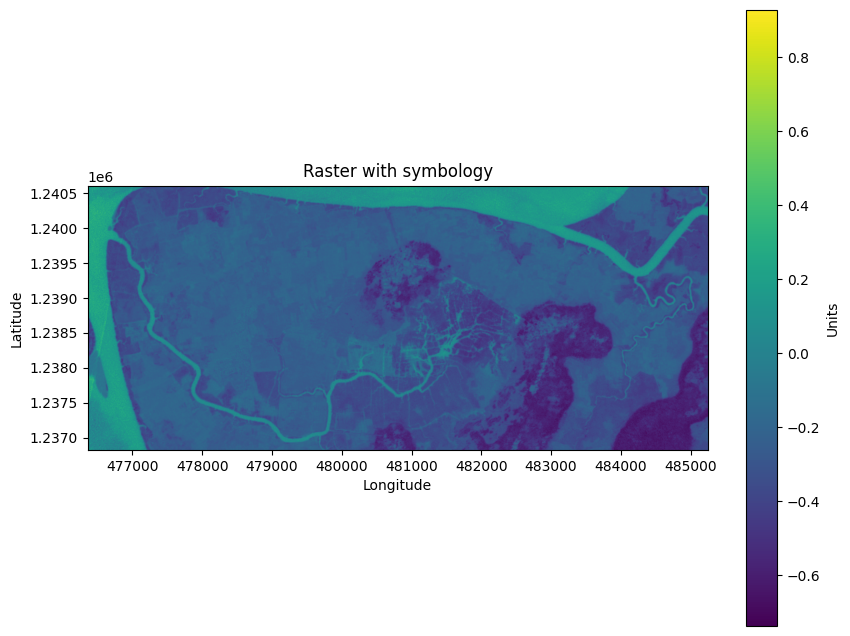

In [8]:
import rasterio.plot
import matplotlib.pyplot as plt


path = '../DataIntermediate/PS_Index_filtered_Cafine.tif'

# open the raster output file for visualization
with rasterio.open(path, 'r') as src:
    # Read data from raster.
    raster_data = src.read(1) # Read the first raster, assuming there is only one raster

    # Get the spatial extent of the raster
    extent = rasterio.plot.plotting_extent(src)

    # Plot the raster with symbology and create the color bar.
    plt.figure(figsize=(10, 8))
    img_plot = plt.imshow(raster_data, extent=extent, cmap='viridis') # You can change the cmap according to your preference
    plt.title('Raster with symbology')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(img_plot, label='Units') # We use the img_plot object to create the color bar
    plt.show()

## 2. Elalab case

### 2.1 Export the image from GEE with the selected index

In [1]:
# Importar librerias al entorno
import geemap
import ee

In [ ]:
Map = geemap.Map(center = (12.20, -16.36), zoom = 12)
Map

Map(center=[12.2, -16.36], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [ ]:
# Asegurarnos de la creación de una geometría
geometry = ee.Geometry.Polygon([[[-16.458035, 12.233829],
   [-16.421471, 12.233829],
   [-16.421471, 12.257315],
   [-16.458035, 12.257315],
   [-16.458035, 12.233829]]])

In [ ]:
collection = ee.ImageCollection("projects/planetscopejesus/assets/Datos_Gabo")

texture = ee.ImageCollection("projects/planetscopejesus/assets/Texture")
pca = ee.Image('projects/planetscopejesus/assets/pca_elalab').float()

collection = collection.filterDate('2022-05-01', '2022-05-30').filterBounds(geometry)

# This function maps spectral indices for salinity Mapping using PlanetScope Imagery
def addIndices(img):
  # NDVI
  NDVI = img.normalizedDifference(['b8','b6']).rename('NDVI')
  SR = img.select('b8').divide(img.select('b6')).rename('SR')
  # GCVI
  GCVI = img.expression('(NIR/GREEN)-1',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GCVI')
  # NDWI (GREEN-NIR)/(GREEN+NIR)
  NDWI = img.expression('(GREEN-NIR)/(GREEN+NIR)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('NDWI')
  # VARI (Green−Red)/(Green+Reed−Blue)
  VARI = img.expression('(Green1-Red)/(Green1+Red-Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('VARI')
  # GRVI (NIR/GREEN)
  GRVI = img.expression('(NIR/GREEN)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GRVI')
  # GNDVI (NIR-GREEN)/(NIR+GREEN)
  GNDVI = img.normalizedDifference(['b8','b3']).rename('GNDVI')
  # SAVI
  SAVI = img.expression('(NIR-RED)/((NIR+RED+0.5)*1.5)',{'NIR': img.select('b8'),'RED': img.select('b6')}).rename('SAVI')
  # VSSI = 2 ∗ 𝐵3 − 5(𝐵4 + 𝐵5) / Green(B3), Red(B4), NIR(B5)
  VSSI = img.expression('2*GREEN-5*(RED+NIR)',{'GREEN': img.select('b3'),'RED': img.select('b6'),'NIR': img.select('b8')}).rename('VSSI')
  # S1 (Blue/Red)
  S1 = img.select('b2').divide(img.select('b6')).rename('S1')
  # S1 (B − R)/(B + R)
  S2 = img.expression('(Blue-Red)/(Blue + Red)',{'Blue':img.select('b2'),'Red':img.select('b6') }).rename('S2')
  # S3_G1 (G1 × R)/B
  S3_G1 = img.expression('(Green1*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('S3_G1')
  # S3_G2 (G1 × R)/B
  S3_G2 = img.expression('(Green2*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green2':img.select('b4') }).rename('S3_G2')
  # S4 (B×R)**0.5
  S4 = img.expression('(Blue*Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('S4')
  # S5_G1 ((B × R)/G1)
  S5_G1= img.expression('(Blue*Red)/Green1',{'Blue':img.select('b2'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S5_G1')
  # S5_G2 ((B × R)/G1)
  S5_G2 = img.expression('(Blue*Red)/Green2',{'Blue':img.select('b2'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('S5_G2')
 # S6_G1 (R × NIR)/G1
  S6_G1 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G1')
  # S6_G2 (R × NIR)/G2
  S6_G2 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G2')
  # SI (B+R)**0.5
  SI = img.expression('(Blue+Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('SI')
  # NDSI (R − NIR)/(R + NIR)
  NDSI = img.normalizedDifference(['b6','b8']).rename('NDSI')
  # SI1_G1 (G1×R)**0.5
  SI1_G1 = img.expression('(Green1*Red)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI1_G1')
  # SI1_G2 (G1×R)**0.5
  SI1_G2 = img.expression('(Green2*Red)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI1_G2')
  # SI2_G1 [(G1)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G1 = img.expression('((Green1)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI2_G1')
  # SI2_G2 [(G2)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G2 = img.expression('((Green2)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI2_G2')
  # SI3_G1 ((G1)**2 + (R)**2)**0.5
  SI3_G1 = img.expression('((Green1)**2 + (Red)**2)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI3_G1')
  # SI3_G2 ((G1)**2 + (R)**2)**0.5
  SI3_G2 = img.expression('((Green2)**2 + (Red)**2)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI3_G2')
  # Int1_G1 (G1 + R)/2
  Int1_G1 = img.expression('(Green1+Red)/2',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int1_G1')
  # Int1_G2 (G2 + R)/2
  Int1_G2 = img.expression('(Green2+Red)/2',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int1_G2')
  # Int2_G1 (G1 + R + NIR)/2
  Int2_G1 = img.expression('(Green1 + Red + NIR)/2',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int2_G1')
  # Int2_G2 (G1 + R + NIR)/2
  Int2_G2 = img.expression('(Green2 + Red + NIR)/2',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int2_G2')
  YRS6_G1 = img.expression('(Y*NIR)/G1',{'Y': img.select('b5'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y*NIR)/G2',{'Y': img.select('b5'),'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  RS6_G1 = img.expression('(Red_edge*NIR)/G1',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge*NIR)/G2',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G2': img.select('b4')}).rename('RS6_G2')
  RS1 = img.expression('B/Red_edge', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS1')
  RS2 = img.expression('(B - Red_edge) / (B + Red_edge)', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS2')
  RS3_G1 = img.expression('(G1 * Red_edge) / B', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G1')
  RS3_G2 = img.expression('(G2 * Red_edge) / B', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G2')
  RS4 = img.expression('(B * Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS4')
  RS5_G1 = img.expression('(B * Red_edge) / G1', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G1': img.select('b3')}).rename('RS5_G1')
  RS5_G2 = img.expression('(B * Red_edge) / G2', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G2': img.select('b4')}).rename('RS5_G2')
  RS6_G1 = img.expression('(Red_edge * NIR) / G1', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge * NIR) / G2', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('RS6_G2')
  RNDSI = img.expression('(Red_edge - NIR) / (Red_edge + NIR)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDSI')
  RNDVI = img.expression('(NIR - Red_edge) / (NIR + Red_edge)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDVI')
  RSI = img.expression('(B + Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RSI')
  RSI1_G1 = img.expression('(G1 * Red_edge) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI1_G1')
  RSI1_G2 = img.expression('(G2 * Red_edge) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI1_G2')
  RSI2_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G1')
  RSI2_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G2')
  RSI3_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI3_G1')
  RSI3_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI3_G2')
  RInt1_G1 = img.expression('(G1 + Red_edge) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RInt1_G1')
  RInt1_G2 = img.expression('(G2 + Red_edge) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RInt1_G2')
  RInt2_G1 = img.expression('(G1 + Red_edge + NIR) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G1')
  RInt2_G2 = img.expression('(G2 + Red_edge + NIR) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G2')
  ####################################################################################### Table 4 ######################################################################################
  YRS1 = img.expression('B/Y', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS1')
  YRS2 = img.expression('(B - Y) / (B + Y)', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS2')
  YRS3_G1 = img.expression('(G1 * Y) / B', {'G1': img.select('b3'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G1')
  YRS3_G2 = img.expression('(G2 * Y) / B', {'G2': img.select('b4'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G2')
  YRS4 = img.expression('(B * Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS4')
  YRS5_G1 = img.expression('(B * Y) / G1', {'B': img.select('b2'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YRS5_G1')
  YRS5_G2 = img.expression('(B * Y) / G2', {'B': img.select('b2'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YRS5_G2')
  YRS6_G1 = img.expression('(Y * NIR) / G1', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y * NIR) / G2', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  YRSI = img.expression('(B + Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRSI')
  YRSI1_G1 = img.expression('(G1 * Y) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI1_G1')
  YRSI1_G2 = img.expression('(G2 * Y) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI1_G2')
  YRSI2_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G1')
  YRSI2_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G2')
  YRSI3_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI3_G1')
  YRSI3_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI3_G2')
  YRInt1_G1 = img.expression('(G1 + Y) / 2', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRInt1_G1')
  YRInt1_G2 = img.expression('(G2 + Y) / 2', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRInt1_G2')
  YRInt2_G1 = img.expression('(G1 + Y + NIR) / 2', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G1')
  YRInt2_G2 = img.expression('(G2 + Y + NIR) / 2', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G2')
  YRNDSI = img.expression('(Y - NIR) / (Y + NIR)', {'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRNDSI')
  ##########################################################
  YRNDVI = img.expression('(NIR - Y) / (NIR + Y)', {'NIR': img.select('b8'), 'Y': img.select('b5')}).rename('YRNDVI')
  YBS1 = img.expression('Y / R', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS1')
  YBS2 = img.expression('(Y - R) / (Y + R)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS2')
  YBS4 = img.expression('(Y * R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS4')
  YBS5_G1 = img.expression('(Y * R) / G1', {'Y': img.select('b5'), 'R': img.select('b6'), 'G1': img.select('b3')}).rename('YBS5_G1')
  YBS5_G2 = img.expression('(Y * R) / G2', {'Y': img.select('b5'), 'R': img.select('b6'), 'G2': img.select('b4')}).rename('YBS5_G2')
  YBSI = img.expression('(Y + R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBSI')
  YGS3 = img.expression('(Y * R) / B', {'B': img.select('b2'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGS3')
  YGSI1 = img.expression('(Y * R) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGSI1')
  YGSI2 = img.expression('((Y ** 2) + (R ** 2) + (NIR ** 2)) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGSI2')
  YGSI3 = img.expression('((Y ** 2) + (R ** 2)) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGSI3')
  YGInt1 = img.expression('(Y + R) / 2', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGInt1')
  YGInt2 = img.expression('(Y + R + NIR) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGInt2')
  YNS6_G1 = img.expression('(R * Y) / G1', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNS6_G1')
  YNS6_G2 = img.expression('(R * Y) / G2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNS6_G2')
  YNSI2_G1 = img.expression('((G1 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G1')
  YNSI2_G2 = img.expression('((G2 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G2')
  YNInt2_G1 = img.expression('(G1 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNInt2_G1')
  YNInt2_G2 = img.expression('(G2 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNInt2_G2')
  YNNDSI = img.expression('(R - Y) / (R + Y)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNNDSI')
  YNNDVI = img.expression('(Y - R) / (Y + R)', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YNNDVI')
  return img \
    .addBands(NDVI)\
    .addBands(SR) \
    .addBands(GCVI) \
    .addBands(NDWI) \
    .addBands(VARI) \
    .addBands(GNDVI)\
    .addBands(GRVI) \
    .addBands(SAVI)\
    .addBands(VSSI)\
    .addBands(S1) \
    .addBands(S2) \
    .addBands(S3_G1) \
    .addBands(S3_G2) \
    .addBands(S4) \
    .addBands(S5_G1) \
    .addBands(S5_G2) \
    .addBands(S6_G1) \
    .addBands(S6_G2) \
    .addBands(SI) \
    .addBands(NDSI) \
    .addBands(SI1_G1) \
    .addBands(SI1_G2) \
    .addBands(SI2_G1) \
    .addBands(SI2_G2) \
    .addBands(SI3_G1) \
    .addBands(SI3_G2) \
    .addBands(Int1_G1) \
    .addBands(Int1_G2) \
    .addBands(Int2_G1) \
    .addBands(Int2_G2) \
    .addBands(YRS6_G1)\
    .addBands(YRS6_G2)\
    .addBands(RS6_G1)\
    .addBands(RS6_G2)\
    .addBands(RS1) \
    .addBands(RS2) \
    .addBands(RS3_G1) \
    .addBands(RS3_G2) \
    .addBands(RS4) \
    .addBands(RS5_G1) \
    .addBands(RS5_G2) \
    .addBands(RNDSI) \
    .addBands(RNDVI)\
    .addBands(RSI) \
    .addBands(RSI1_G1) \
    .addBands(RSI1_G2) \
    .addBands(RSI2_G1) \
    .addBands(RSI2_G2) \
    .addBands(RSI3_G1) \
    .addBands(RSI3_G2) \
    .addBands(RInt1_G1) \
    .addBands(RInt1_G2) \
    .addBands(RInt2_G1) \
    .addBands(RInt2_G2) \
    .addBands([YRS1, YRS2, YRS3_G1, YRS3_G2, YRS4, YRS5_G1, YRS5_G2,
                        YRSI, YRSI1_G1, YRSI1_G2, YRSI2_G1, YRSI2_G2, YRSI3_G1, YRSI3_G2,
                        YRInt1_G1, YRInt1_G2, YRInt2_G1, YRInt2_G2, YRNDSI])\
    .addBands([YRNDVI, YBS1, YBS2, YBS4, YBS5_G1, YBS5_G2, YBSI, YGS3, YGSI1, YGSI2, YGSI3,
               YGInt1, YGInt2, YNS6_G1, YNS6_G2, YNSI2_G1, YNSI2_G2, YNInt2_G1, YNInt2_G2,
               YNNDSI, YNNDVI])


ps = collection

#Add the indices
ps_1 = ps.map(addIndices)
composite = ps_1 \
              .mean()\
              .float()

texture1 = texture.mean()


# Seleccionar la banda NIR
nir = composite.select('b8').toInt32()

# Calcular la textura utilizando el índice de contraste (Contrast Index)
texture = nir.glcmTexture()
texture_b8 = texture.select('b8_asm').float()


composite = composite.addBands(texture1).addBands(pca).addBands(texture_b8)

# Agregar la capa de textura al mapa
Map.addLayer(texture, {}, 'Textura NIR')
Map.addLayer(composite, {'bands': ['b6',  'b4',  'b2'], 'min': 201, 'max': 2464}, 'RGB')
Map.addLayer(composite, {'bands': ['S1',  'S2',  'S3_G1'], 'min': 0, 'max': 1}, 'Index')
# NOTA RELEVANTE sobre orden raster de textura de suelo caso Elalab:
# B1_1 = Sand
# B2_1 = Clay
# B3_1 = Clay+Silt
# B4_1 = Silt

#Exportar las bandas para modelar Cafine. # Orden 'RNDSI', 'NDWI','NDSI', 'Silt'
export = composite.select(['RNDSI', 'NDWI','NDSI','b4_1'])


In [ ]:
geemap.ee_export_image_to_drive(
    export, description='PS_Index_filtered_Elalab', folder='Planet_Images_Model_Salinity', region=geometry, scale= 3, crs = 'EPSG:2095'
)

### 2.2 Download the image from GEE and apply the RF model 

In [9]:
# Google Drive folder ID
folder_id = '1iPqQkFH8ACsOgf0Pk8iZsiXpw0WqP6Sp'  # Replace with your actual folder ID
file_title = 'PS_Index_filtered_Elalab.tif'  # Name of the file you are looking for

try:
    # List all files in the specified folder
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
    
    # Iterate through the file list to find the file with the specified title
    for file in file_list:
        if file['title'] == file_title:
            # Download the file
            file.GetContentFile(file_title)
            print(f"File {file_title} downloaded successfully.")
            break
    else:
        # File not found in the folder
        print(f"File {file_title} not found in folder {folder_id}.")
except Exception as e:
    # Print any errors that occur during the process
    print(f"Error while searching for the file in Google Drive: {e}")

Error while searching for the file in Google Drive: name 'drive' is not defined


In [10]:
import rasterio
import numpy as np
from sklearn.preprocessing import StandardScaler
import os.path as op
import joblib


# Imagen de entrada
image_filered = '../DataIntermediate/PS_Index_filtered_Elalab.tif'

# Especificar la imagen de salida
output_image = op.join('../Results', "Elalab_RF_Modeled_CE.tif")

with rasterio.open(image_filered, 'r') as src:
    profile = src.profile
    profile.update(
        dtype=rasterio.float32,
        count=1,
    )
    with rasterio.open(output_image, 'w', **profile) as dst:
        # Leer toda la imagen
        data = src.read()

        # Preparar la imagen para la predicción
        img_swp = np.moveaxis(data, 0, 2)
        img_flat = img_swp.reshape(-1, img_swp.shape[-1])

        # Eliminar valores no válidos, almacenar los índices para su uso posterior
        m = np.ma.masked_invalid(img_flat)
        valid_pixels = img_flat[~m.mask.any(axis=1)]
        rf_model_path = '../Results/random_forest_model_global_CE_27_02_2025.joblib'
        scaler_path = '../DataIntermediate/scaler_27_02_2025.joblib'  # Ruta del scaler

        rf_model_raster = joblib.load(rf_model_path)
        scaler = joblib.load(scaler_path)  # Cargar el scaler si fue utilizado durante el entrenamiento

        # Omitir entradas vacías
        if len(valid_pixels):
            # Escalar los datos de píxeles válidos si el scaler se usó durante el entrenamiento
            valid_pixels_scaled = scaler.transform(valid_pixels)

            # Predecir
            img_preds = rf_model_raster.predict(valid_pixels_scaled)
            print(img_preds)

            # Añadir la predicción de vuelta a los píxeles válidos
            output = np.zeros(img_flat.shape[0], dtype=np.float32)
            output[~m.mask.any(axis=1)] = img_preds.flatten()

            # Redimensionar a las dimensiones originales de la imagen
            output = output.reshape(*img_swp.shape[:-1])

            # Crear la máscara final
            mask = (~m.mask.any(axis=1)).reshape(*img_swp.shape[:-1])

            # Escribir en los archivos finales
            dst.write(output.astype(rasterio.float32), 1)
            dst.write_mask(mask)

[209.40194667 186.51416667 166.66932667 ...  79.04779333  82.69630667
  78.62027333]


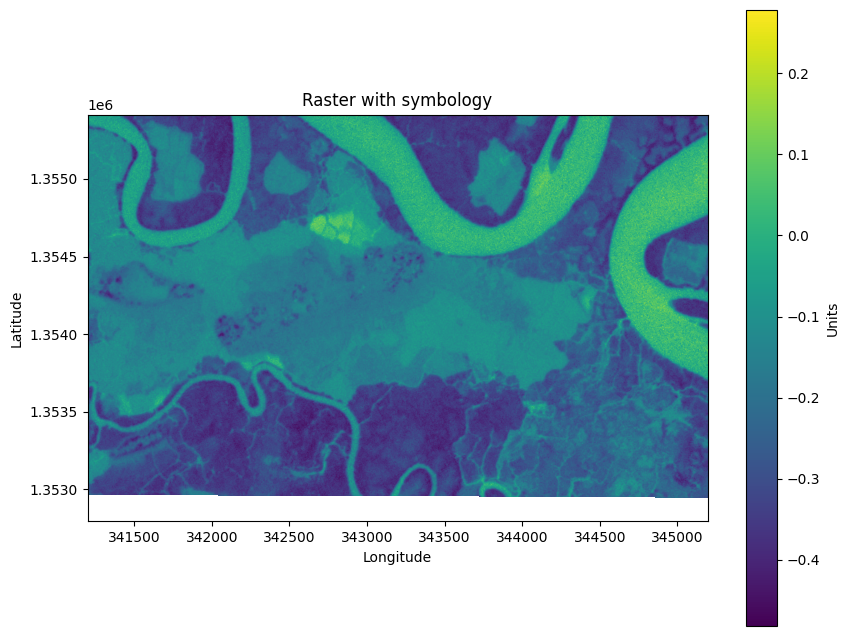

In [11]:
import rasterio.plot
import matplotlib.pyplot as plt


path = '../DataIntermediate/PS_Index_filtered_Elalab.tif'

# open the raster output file for visualization
with rasterio.open(path, 'r') as src:
    # Read data from raster.
    raster_data = src.read(1) # Read the first raster, assuming there is only one raster

    # Get the spatial extent of the raster
    extent = rasterio.plot.plotting_extent(src)

    # Plot the raster with symbology and create the color bar.
    plt.figure(figsize=(10, 8))
    img_plot = plt.imshow(raster_data, extent=extent, cmap='viridis') # You can change the cmap according to your preference
    plt.title('Raster with symbology')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(img_plot, label='Units') # We use the img_plot object to create the color bar
    plt.show()

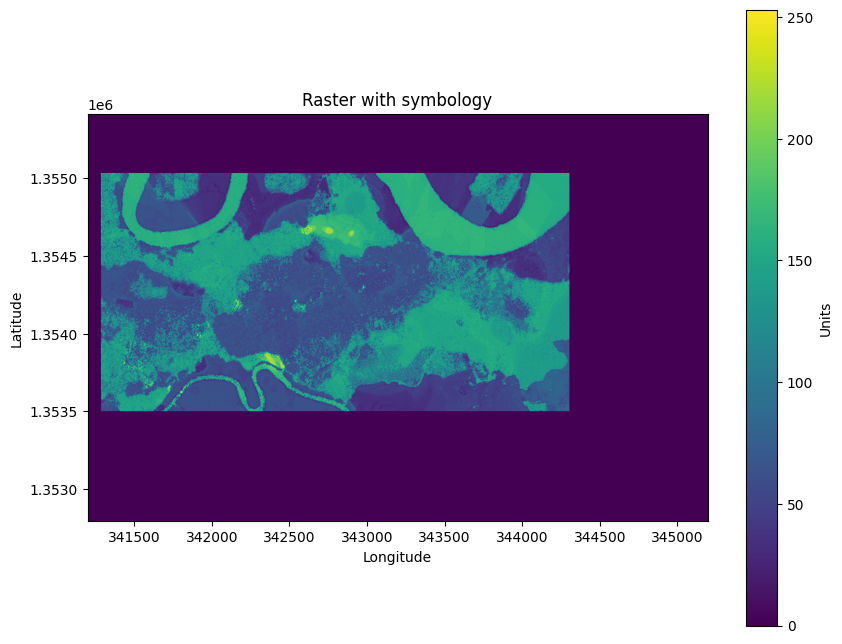

In [12]:
import rasterio.plot
import matplotlib.pyplot as plt

# open the raster output file for visualization
with rasterio.open(output_image, 'r') as src:
    # Read data from raster.
    raster_data = src.read(1) # Read the first raster, assuming there is only one raster

    # Get the spatial extent of the raster
    extent = rasterio.plot.plotting_extent(src)

    # Plot the raster with symbology and create the color bar.
    plt.figure(figsize=(10, 8))
    img_plot = plt.imshow(raster_data, extent=extent, cmap='viridis') # You can change the cmap according to your preference
    plt.title('Raster with symbology')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(img_plot, label='Units') # We use the img_plot object to create the color bar
    plt.show()

## 3. Enchugal case

### 3.1 Export the image from GEE with the selected index

In [ ]:
# Importar librerias al entorno
import geemap
import ee

In [ ]:
Map = geemap.Map(center = (12.06, -15.45), zoom = 15)
Map

Map(center=[12.06, -15.45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [ ]:
geometry = ee.Geometry.Polygon([[[-15.460081, 12.035711],
   [-15.460081, 12.066852],
   [-15.427122, 12.066852],
   [-15.427122, 12.035711],
   [-15.460081, 12.035711]]])

In [ ]:
collection = ee.ImageCollection("projects/planetscopejesus/assets/Datos_Gabo")

texture = ee.ImageCollection("projects/planetscopejesus/assets/Texture_enchugal")
pca = ee.Image('projects/planetscopejesus/assets/pca_enchugal').float()

collection = collection.filterDate('2023-05-01', '2023-05-30').filterBounds(geometry)

# This function maps spectral indices for salinity Mapping using PlanetScope Imagery
def addIndices(img):
  # NDVI
  NDVI = img.normalizedDifference(['b8','b6']).rename('NDVI')
  SR = img.select('b8').divide(img.select('b6')).rename('SR')
  # GCVI
  GCVI = img.expression('(NIR/GREEN)-1',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GCVI')
  # NDWI (GREEN-NIR)/(GREEN+NIR)
  NDWI = img.expression('(GREEN-NIR)/(GREEN+NIR)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('NDWI')
  # VARI (Green−Red)/(Green+Reed−Blue)
  VARI = img.expression('(Green1-Red)/(Green1+Red-Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('VARI')
  # GRVI (NIR/GREEN)
  GRVI = img.expression('(NIR/GREEN)',{'NIR':img.select('b8'),'GREEN':img.select('b3')}).rename('GRVI')
  # GNDVI (NIR-GREEN)/(NIR+GREEN)
  GNDVI = img.normalizedDifference(['b8','b3']).rename('GNDVI')
  # SAVI
  SAVI = img.expression('(NIR-RED)/((NIR+RED+0.5)*1.5)',{'NIR': img.select('b8'),'RED': img.select('b6')}).rename('SAVI')
  # VSSI = 2 ∗ 𝐵3 − 5(𝐵4 + 𝐵5) / Green(B3), Red(B4), NIR(B5)
  VSSI = img.expression('2*GREEN-5*(RED+NIR)',{'GREEN': img.select('b3'),'RED': img.select('b6'),'NIR': img.select('b8')}).rename('VSSI')
  # S1 (Blue/Red)
  S1 = img.select('b2').divide(img.select('b6')).rename('S1')
  # S1 (B − R)/(B + R)
  S2 = img.expression('(Blue-Red)/(Blue + Red)',{'Blue':img.select('b2'),'Red':img.select('b6') }).rename('S2')
  # S3_G1 (G1 × R)/B
  S3_G1 = img.expression('(Green1*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green1':img.select('b3') }).rename('S3_G1')
  # S3_G2 (G1 × R)/B
  S3_G2 = img.expression('(Green2*Red)/(Blue)',{'Blue':img.select('b2'),'Red':img.select('b6'),'Green2':img.select('b4') }).rename('S3_G2')
  # S4 (B×R)**0.5
  S4 = img.expression('(Blue*Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('S4')
  # S5_G1 ((B × R)/G1)
  S5_G1= img.expression('(Blue*Red)/Green1',{'Blue':img.select('b2'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S5_G1')
  # S5_G2 ((B × R)/G1)
  S5_G2 = img.expression('(Blue*Red)/Green2',{'Blue':img.select('b2'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('S5_G2')
 # S6_G1 (R × NIR)/G1
  S6_G1 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G1')
  # S6_G2 (R × NIR)/G2
  S6_G2 = img.expression('(Red*NIR)/Green1',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('S6_G2')
  # SI (B+R)**0.5
  SI = img.expression('(Blue+Red)**0.5',{'Blue':img.select('b2'),'Red':img.select('b6')}).rename('SI')
  # NDSI (R − NIR)/(R + NIR)
  NDSI = img.normalizedDifference(['b6','b8']).rename('NDSI')
  # SI1_G1 (G1×R)**0.5
  SI1_G1 = img.expression('(Green1*Red)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI1_G1')
  # SI1_G2 (G1×R)**0.5
  SI1_G2 = img.expression('(Green2*Red)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI1_G2')
  # SI2_G1 [(G1)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G1 = img.expression('((Green1)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI2_G1')
  # SI2_G2 [(G2)**2 + (R)**2 + (NIR)**2]**0.5
  SI2_G2 = img.expression('((Green2)**2 + (Red)**2 + (NIR)**2)**0.5',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI2_G2')
  # SI3_G1 ((G1)**2 + (R)**2)**0.5
  SI3_G1 = img.expression('((Green1)**2 + (Red)**2)**0.5',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('SI3_G1')
  # SI3_G2 ((G1)**2 + (R)**2)**0.5
  SI3_G2 = img.expression('((Green2)**2 + (Red)**2)**0.5',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('SI3_G2')
  # Int1_G1 (G1 + R)/2
  Int1_G1 = img.expression('(Green1+Red)/2',{'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int1_G1')
  # Int1_G2 (G2 + R)/2
  Int1_G2 = img.expression('(Green2+Red)/2',{'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int1_G2')
  # Int2_G1 (G1 + R + NIR)/2
  Int2_G1 = img.expression('(Green1 + Red + NIR)/2',{'NIR':img.select('b8'),'Green1':img.select('b3'),'Red':img.select('b6')}).rename('Int2_G1')
  # Int2_G2 (G1 + R + NIR)/2
  Int2_G2 = img.expression('(Green2 + Red + NIR)/2',{'NIR':img.select('b8'),'Green2':img.select('b4'),'Red':img.select('b6')}).rename('Int2_G2')
  YRS6_G1 = img.expression('(Y*NIR)/G1',{'Y': img.select('b5'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y*NIR)/G2',{'Y': img.select('b5'),'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  RS6_G1 = img.expression('(Red_edge*NIR)/G1',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge*NIR)/G2',{'Red_edge': img.select('b7'),'NIR': img.select('b8'),'G2': img.select('b4')}).rename('RS6_G2')
  RS1 = img.expression('B/Red_edge', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS1')
  RS2 = img.expression('(B - Red_edge) / (B + Red_edge)', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS2')
  RS3_G1 = img.expression('(G1 * Red_edge) / B', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G1')
  RS3_G2 = img.expression('(G2 * Red_edge) / B', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'B': img.select('b2')}).rename('RS3_G2')
  RS4 = img.expression('(B * Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RS4')
  RS5_G1 = img.expression('(B * Red_edge) / G1', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G1': img.select('b3')}).rename('RS5_G1')
  RS5_G2 = img.expression('(B * Red_edge) / G2', {'B': img.select('b2'), 'Red_edge': img.select('b7'), 'G2': img.select('b4')}).rename('RS5_G2')
  RS6_G1 = img.expression('(Red_edge * NIR) / G1', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('RS6_G1')
  RS6_G2 = img.expression('(Red_edge * NIR) / G2', {'Red_edge': img.select('b7'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('RS6_G2')
  RNDSI = img.expression('(Red_edge - NIR) / (Red_edge + NIR)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDSI')
  RNDVI = img.expression('(NIR - Red_edge) / (NIR + Red_edge)', {'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RNDVI')
  RSI = img.expression('(B + Red_edge) ** 0.5', {'B': img.select('b2'), 'Red_edge': img.select('b7')}).rename('RSI')
  RSI1_G1 = img.expression('(G1 * Red_edge) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI1_G1')
  RSI1_G2 = img.expression('(G2 * Red_edge) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI1_G2')
  RSI2_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G1')
  RSI2_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2 + (NIR) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RSI2_G2')
  RSI3_G1 = img.expression('((G1) ** 2 + (Red_edge) ** 2) ** 0.5', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RSI3_G1')
  RSI3_G2 = img.expression('((G2) ** 2 + (Red_edge) ** 2) ** 0.5', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RSI3_G2')
  RInt1_G1 = img.expression('(G1 + Red_edge) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7')}).rename('RInt1_G1')
  RInt1_G2 = img.expression('(G2 + Red_edge) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7')}).rename('RInt1_G2')
  RInt2_G1 = img.expression('(G1 + Red_edge + NIR) / 2', {'G1': img.select('b3'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G1')
  RInt2_G2 = img.expression('(G2 + Red_edge + NIR) / 2', {'G2': img.select('b4'), 'Red_edge': img.select('b7'), 'NIR': img.select('b8')}).rename('RInt2_G2')
  ####################################################################################### Table 4 ######################################################################################
  YRS1 = img.expression('B/Y', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS1')
  YRS2 = img.expression('(B - Y) / (B + Y)', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS2')
  YRS3_G1 = img.expression('(G1 * Y) / B', {'G1': img.select('b3'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G1')
  YRS3_G2 = img.expression('(G2 * Y) / B', {'G2': img.select('b4'), 'Y': img.select('b5'), 'B': img.select('b2')}).rename('YRS3_G2')
  YRS4 = img.expression('(B * Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRS4')
  YRS5_G1 = img.expression('(B * Y) / G1', {'B': img.select('b2'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YRS5_G1')
  YRS5_G2 = img.expression('(B * Y) / G2', {'B': img.select('b2'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YRS5_G2')
  YRS6_G1 = img.expression('(Y * NIR) / G1', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G1': img.select('b3')}).rename('YRS6_G1')
  YRS6_G2 = img.expression('(Y * NIR) / G2', {'Y': img.select('b5'), 'NIR': img.select('b8'), 'G2': img.select('b4')}).rename('YRS6_G2')
  YRSI = img.expression('(B + Y) ** 0.5', {'B': img.select('b2'), 'Y': img.select('b5')}).rename('YRSI')
  YRSI1_G1 = img.expression('(G1 * Y) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI1_G1')
  YRSI1_G2 = img.expression('(G2 * Y) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI1_G2')
  YRSI2_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G1')
  YRSI2_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2) + ((NIR) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRSI2_G2')
  YRSI3_G1 = img.expression('(((G1) ** 2) + ((Y) ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRSI3_G1')
  YRSI3_G2 = img.expression('(((G2) ** 2) + ((Y) ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRSI3_G2')
  YRInt1_G1 = img.expression('(G1 + Y) / 2', {'G1': img.select('b3'), 'Y': img.select('b5')}).rename('YRInt1_G1')
  YRInt1_G2 = img.expression('(G2 + Y) / 2', {'G2': img.select('b4'), 'Y': img.select('b5')}).rename('YRInt1_G2')
  YRInt2_G1 = img.expression('(G1 + Y + NIR) / 2', {'G1': img.select('b3'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G1')
  YRInt2_G2 = img.expression('(G2 + Y + NIR) / 2', {'G2': img.select('b4'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRInt2_G2')
  YRNDSI = img.expression('(Y - NIR) / (Y + NIR)', {'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YRNDSI')
  ##########################################################
  YRNDVI = img.expression('(NIR - Y) / (NIR + Y)', {'NIR': img.select('b8'), 'Y': img.select('b5')}).rename('YRNDVI')
  YBS1 = img.expression('Y / R', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS1')
  YBS2 = img.expression('(Y - R) / (Y + R)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS2')
  YBS4 = img.expression('(Y * R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBS4')
  YBS5_G1 = img.expression('(Y * R) / G1', {'Y': img.select('b5'), 'R': img.select('b6'), 'G1': img.select('b3')}).rename('YBS5_G1')
  YBS5_G2 = img.expression('(Y * R) / G2', {'Y': img.select('b5'), 'R': img.select('b6'), 'G2': img.select('b4')}).rename('YBS5_G2')
  YBSI = img.expression('(Y + R) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YBSI')
  YGS3 = img.expression('(Y * R) / B', {'B': img.select('b2'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGS3')
  YGSI1 = img.expression('(Y * R) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGSI1')
  YGSI2 = img.expression('((Y ** 2) + (R ** 2) + (NIR ** 2)) ** 0.5', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGSI2')
  YGSI3 = img.expression('((Y ** 2) + (R ** 2)) ** 0.5', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YGSI3')
  YGInt1 = img.expression('(Y + R) / 2', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YGInt1')
  YGInt2 = img.expression('(Y + R + NIR) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'NIR': img.select('b8')}).rename('YGInt2')
  YNS6_G1 = img.expression('(R * Y) / G1', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNS6_G1')
  YNS6_G2 = img.expression('(R * Y) / G2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNS6_G2')
  YNSI2_G1 = img.expression('((G1 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G1': img.select('b3'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G1')
  YNSI2_G2 = img.expression('((G2 ** 2) + (R ** 2) + (Y ** 2)) ** 0.5', {'G2': img.select('b4'), 'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNSI2_G2')
  YNInt2_G1 = img.expression('(G1 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G1': img.select('b3')}).rename('YNInt2_G1')
  YNInt2_G2 = img.expression('(G2 + R + Y) / 2', {'R': img.select('b6'), 'Y': img.select('b5'), 'G2': img.select('b4')}).rename('YNInt2_G2')
  YNNDSI = img.expression('(R - Y) / (R + Y)', {'Y': img.select('b5'), 'R': img.select('b6')}).rename('YNNDSI')
  YNNDVI = img.expression('(Y - R) / (Y + R)', {'R': img.select('b6'), 'Y': img.select('b5')}).rename('YNNDVI')
  return img \
    .addBands(NDVI)\
    .addBands(SR) \
    .addBands(GCVI) \
    .addBands(NDWI) \
    .addBands(VARI) \
    .addBands(GNDVI)\
    .addBands(GRVI) \
    .addBands(SAVI)\
    .addBands(VSSI)\
    .addBands(S1) \
    .addBands(S2) \
    .addBands(S3_G1) \
    .addBands(S3_G2) \
    .addBands(S4) \
    .addBands(S5_G1) \
    .addBands(S5_G2) \
    .addBands(S6_G1) \
    .addBands(S6_G2) \
    .addBands(SI) \
    .addBands(NDSI) \
    .addBands(SI1_G1) \
    .addBands(SI1_G2) \
    .addBands(SI2_G1) \
    .addBands(SI2_G2) \
    .addBands(SI3_G1) \
    .addBands(SI3_G2) \
    .addBands(Int1_G1) \
    .addBands(Int1_G2) \
    .addBands(Int2_G1) \
    .addBands(Int2_G2) \
    .addBands(YRS6_G1)\
    .addBands(YRS6_G2)\
    .addBands(RS6_G1)\
    .addBands(RS6_G2)\
    .addBands(RS1) \
    .addBands(RS2) \
    .addBands(RS3_G1) \
    .addBands(RS3_G2) \
    .addBands(RS4) \
    .addBands(RS5_G1) \
    .addBands(RS5_G2) \
    .addBands(RNDSI) \
    .addBands(RNDVI)\
    .addBands(RSI) \
    .addBands(RSI1_G1) \
    .addBands(RSI1_G2) \
    .addBands(RSI2_G1) \
    .addBands(RSI2_G2) \
    .addBands(RSI3_G1) \
    .addBands(RSI3_G2) \
    .addBands(RInt1_G1) \
    .addBands(RInt1_G2) \
    .addBands(RInt2_G1) \
    .addBands(RInt2_G2) \
    .addBands([YRS1, YRS2, YRS3_G1, YRS3_G2, YRS4, YRS5_G1, YRS5_G2,
                        YRSI, YRSI1_G1, YRSI1_G2, YRSI2_G1, YRSI2_G2, YRSI3_G1, YRSI3_G2,
                        YRInt1_G1, YRInt1_G2, YRInt2_G1, YRInt2_G2, YRNDSI])\
    .addBands([YRNDVI, YBS1, YBS2, YBS4, YBS5_G1, YBS5_G2, YBSI, YGS3, YGSI1, YGSI2, YGSI3,
               YGInt1, YGInt2, YNS6_G1, YNS6_G2, YNSI2_G1, YNSI2_G2, YNInt2_G1, YNInt2_G2,
               YNNDSI, YNNDVI])


ps = collection

#Add the indices
ps_1 = ps.map(addIndices)
composite = ps_1 \
              .mean()\
              .float()

texture1 = texture.mean()


# Seleccionar la banda NIR
nir = composite.select('b8').toInt32()

# Calcular la textura utilizando el índice de contraste (Contrast Index)
texture = nir.glcmTexture()
texture_b8 = texture.select('b8_asm').float()


composite = composite.addBands(texture1).addBands(pca).addBands(texture_b8)

# Agregar la capa de textura al mapa
Map.addLayer(texture, {}, 'Textura NIR')
Map.addLayer(composite, {'bands': ['b6',  'b4',  'b2'], 'min': 201, 'max': 2464}, 'RGB')
Map.addLayer(composite, {'bands': ['S1',  'S2',  'S3_G1'], 'min': 0, 'max': 1}, 'Index')
# NOTA RELEVANTE sobre orden raster de textura de suelo caso de Enchugal:
# B1_1 = Clay
# B2_1 = Sand
# B3_1 = Silt
# B4_1 = Clay+Silt

# 'RNDSI', 'NDWI','NDSI'
#Exportar las bandas para modelar Cafine. # 'RNDSI', 'NDWI','NDSI', 'Silt'
export = composite.select(['RNDSI', 'NDWI','NDSI','b3_1'])

No such comm: c66e0fba19af40ed89d3126a7f7fdda2
No such comm: ebfc04277a30401c95ab0364a3a8d6b9
No such comm: c66e0fba19af40ed89d3126a7f7fdda2
No such comm: ebfc04277a30401c95ab0364a3a8d6b9
No such comm: ebfc04277a30401c95ab0364a3a8d6b9


In [ ]:
geemap.ee_export_image_to_drive(
    export, description='PS_Index_filtered_Enchugal', folder='Planet_Images_Model_Salinity', region=geometry, scale= 3, crs = 'EPSG:2095'
)

### 3.2 Download the image from GEE and apply the RF model 

In [ ]:
# Google Drive folder ID
folder_id = '1iPqQkFH8ACsOgf0Pk8iZsiXpw0WqP6Sp'  # Replace with your actual folder ID
file_title = 'PS_Index_filtered_Enchugal.tif'  # Name of the file you are looking for

try:
    # List all files in the specified folder
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
    
    # Iterate through the file list to find the file with the specified title
    for file in file_list:
        if file['title'] == file_title:
            # Download the file
            file.GetContentFile(file_title)
            print(f"File {file_title} downloaded successfully.")
            break
    else:
        # File not found in the folder
        print(f"File {file_title} not found in folder {folder_id}.")
except Exception as e:
    # Print any errors that occur during the process
    print(f"Error while searching for the file in Google Drive: {e}")

File PS_Index_filtered_Enchugal.tif downloaded successfully.


In [13]:
import rasterio
import numpy as np
from sklearn.preprocessing import StandardScaler
import os.path as op
import joblib


# Imagen de entrada
image_filered = '../DataIntermediate/PS_Index_filtered_Enchugal.tif'

# Especificar la imagen de salida
output_image = op.join('../Results', "Enchugal_RF_Modeled_CE.tif")

with rasterio.open(image_filered, 'r') as src:
    profile = src.profile
    profile.update(
        dtype=rasterio.float32,
        count=1,
    )
    with rasterio.open(output_image, 'w', **profile) as dst:
        # Leer toda la imagen
        data = src.read()

        # Preparar la imagen para la predicción
        img_swp = np.moveaxis(data, 0, 2)
        img_flat = img_swp.reshape(-1, img_swp.shape[-1])

        # Eliminar valores no válidos, almacenar los índices para su uso posterior
        m = np.ma.masked_invalid(img_flat)
        valid_pixels = img_flat[~m.mask.any(axis=1)]
        rf_model_path = '../Results/random_forest_model_global_CE_27_02_2025.joblib'
        scaler_path = '../DataIntermediate/scaler_27_02_2025.joblib'  # Ruta del scaler

        rf_model_raster = joblib.load(rf_model_path)
        scaler = joblib.load(scaler_path)  # Cargar el scaler si fue utilizado durante el entrenamiento

        # Omitir entradas vacías
        if len(valid_pixels):
            # Escalar los datos de píxeles válidos si el scaler se usó durante el entrenamiento
            valid_pixels_scaled = scaler.transform(valid_pixels)

            # Predecir
            img_preds = rf_model_raster.predict(valid_pixels_scaled)
            print(img_preds)

            # Añadir la predicción de vuelta a los píxeles válidos
            output = np.zeros(img_flat.shape[0], dtype=np.float32)
            output[~m.mask.any(axis=1)] = img_preds.flatten()

            # Redimensionar a las dimensiones originales de la imagen
            output = output.reshape(*img_swp.shape[:-1])

            # Crear la máscara final
            mask = (~m.mask.any(axis=1)).reshape(*img_swp.shape[:-1])

            # Escribir en los archivos finales
            dst.write(output.astype(rasterio.float32), 1)
            dst.write_mask(mask)

[170.96627333 126.39073333  42.90756667 ...  17.25806667  14.66968667
  21.68300667]


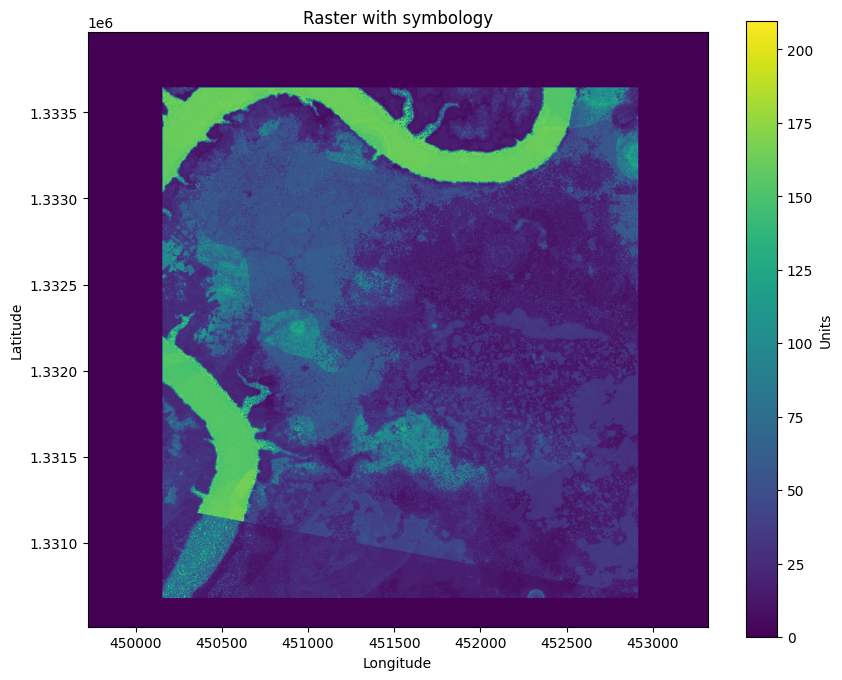

In [14]:
import rasterio.plot
import matplotlib.pyplot as plt

# open the raster output file for visualization
with rasterio.open(output_image, 'r') as src:
    # Read data from raster.
    raster_data = src.read(1) # Read the first raster, assuming there is only one raster

    # Get the spatial extent of the raster
    extent = rasterio.plot.plotting_extent(src)

    # Plot the raster with symbology and create the color bar.
    plt.figure(figsize=(10, 8))
    img_plot = plt.imshow(raster_data, extent=extent, cmap='viridis') # You can change the cmap according to your preference
    plt.title('Raster with symbology')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(img_plot, label='Units') # We use the img_plot object to create the color bar
    plt.show()